## NLTK 자연어 처리 패키지¶

#### NLTK(Natural Language Toolkit) : 교육용으로 개발된 자연어 처리 및 문서 분석용 파이썬 패키지

#### NLTK 패키지가 제공하는 주요 기능

* 말뭉치
* 토큰 생성
* 형태소 분석
* 품사 태깅


In [1]:
# ! pip install nltk
import nltk
nltk.__version__

'3.6.1'

### 0. 말뭉치(Corpus) 다운로드

In [2]:
nltk.download("book",quiet=True)
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


#### 저작권이 말소된 문학작품을 포함하는 gutenberg 말뭉치에 들어 있는 작품 샘플들

In [3]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

### 1. gutenberg 말뭉치(Corpus) 가져오기 
- William Shakespeare의 Hamlet (1599) 

In [5]:
hamlet_raw = nltk.corpus.gutenberg.raw('shakespeare-hamlet.txt')
print(hamlet_raw[:924])

[The Tragedie of Hamlet by William Shakespeare 1599]


Actus Primus. Scoena Prima.

Enter Barnardo and Francisco two Centinels.

  Barnardo. Who's there?
  Fran. Nay answer me: Stand & vnfold
your selfe

   Bar. Long liue the King

   Fran. Barnardo?
  Bar. He

   Fran. You come most carefully vpon your houre

   Bar. 'Tis now strook twelue, get thee to bed Francisco

   Fran. For this releefe much thankes: 'Tis bitter cold,
And I am sicke at heart

   Barn. Haue you had quiet Guard?
  Fran. Not a Mouse stirring

   Barn. Well, goodnight. If you do meet Horatio and
Marcellus, the Riuals of my Watch, bid them make hast.
Enter Horatio and Marcellus.

  Fran. I thinke I heare them. Stand: who's there?
  Hor. Friends to this ground

   Mar. And Leige-men to the Dane

   Fran. Giue you good night

   Mar. O farwel honest Soldier, who hath relieu'd you?
  Fra. Barnardo ha's my place: giue you goodnight.

Exit Fran.




### 2. 토큰 생성

- 문자열 단위를 토큰(token)이라고 하고 문자열을 토큰으로 나누는 작업을 토큰 생성(tokenizing)이라 한다
- 영어 경우 문장, 단어등을 토큰으로 사용.
- 문자열을 토큰으로 분리하는 함수를 토큰 생성 함수(tokenizer)라고 한다. 토큰 생성 함수는 문자열을 입력받아 토큰 문자열의 리스트를 출력한다.컴마

#### 2.1 문장 토큰화(Sentence Tokenization)
- 보통 갖고있는 코퍼스가 정제되지 않은 상태라면, 코퍼스는 문장 단위로 구분되어 있지 않아서 이를 사용하고자 하는 용도에 맞게 문장 토큰화가 필요할 수 있음
- 보통은 문장이 끝나는 명확한 구분자 ?나 마침표(.)나 ! 기준으로 문장을 잘라냄.
- 하지만 마침표는 끝이 아니더라도 등장할 수 있

In [6]:
from nltk.tokenize import sent_tokenize
print(sent_tokenize(hamlet_raw[90:212]))

['Barnardo and Francisco two Centinels.', 'Barnardo.', "Who's there?", 'Fran.', 'Nay answer me: Stand & vnfold\nyour selfe\n\n   Bar.']


#### 2.2 단어 토큰화(word tokenization)
- 구두점을 지운 뒤에 띄어쓰기(whitespace)를 기준으로 잘라
- 입력 : Time is an illusion. Lunchtime double so!
- 토근화 => 출력 : "Time", "is", "an", "illustion", "Lunchtime", "double", "so"
- 구두점이나 특수문자를 전부 제거하는 정제(cleaning) 작업을 수행하는 것만으로 해결되지 않음 => 구두점이나 특수문자를 전부 제거하면 토큰이 의미를 잃어버리는 경우가 발생하기 때문 ( 특히 한국어는 더욱 그러함 )

##### 2.2.1 word_tokenize
- Who's => Who / 's 로 분리

In [9]:
from nltk.tokenize import word_tokenize
word_tokenize(hamlet_raw[90:212])

['Barnardo',
 'and',
 'Francisco',
 'two',
 'Centinels',
 '.',
 'Barnardo',
 '.',
 'Who',
 "'s",
 'there',
 '?',
 'Fran',
 '.',
 'Nay',
 'answer',
 'me',
 ':',
 'Stand',
 '&',
 'vnfold',
 'your',
 'selfe',
 'Bar',
 '.']

In [8]:
word_tokenize('"오늘은 즐거운 휴가야!" 친구가 말했다')

['``', '오늘은', '즐거운', '휴가야', '!', "''", '친구가', '말했다']

##### 2.2.2 WordPunctTokenizer
- WordPunctTokenizer는 구두점을 별도로 분류하는 특징을 갖고 있음
- Who's => Who , ' ,  s 로 분리

In [8]:
from nltk.tokenize import WordPunctTokenizer 
WordPunctTokenizer().tokenize(hamlet_raw[90:200])

['Barnardo',
 'and',
 'Francisco',
 'two',
 'Centinels',
 '.',
 'Barnardo',
 '.',
 'Who',
 "'",
 's',
 'there',
 '?',
 'Fran',
 '.',
 'Nay',
 'answer',
 'me',
 ':',
 'Stand',
 '&',
 'vnfold',
 'your',
 'sel']

##### 2.2.3 RegexpTokenizer
- 정규 표현식을 사용한 토큰 생성

In [12]:
from nltk.tokenize import RegexpTokenizer
retokenize = RegexpTokenizer("[\w]+") # w = 문자/숫자
# \w - 문자+숫자(alphanumeric)와 매치, [a-zA-Z0-9_]와 동일한 표현식이다.
retokenize.tokenize(hamlet_raw[50:100])

['9', 'Actus', 'Primus', 'Scoena', 'Prima', 'Enter', 'Barnardo', 'a']

### *토근화 주의사항 
1. 구두점이나 특수 문자를 단순 제외해서는 안 된다.
    - m.p.h나 Ph.D나 AT&T 같은 경우
    - 특수 문자의 달러나 슬래시(/)
       - 예: $45.55와 같은 가격을 의미 => 45.55를 하나로 취급
       - 예 : 01/02/06은 날짜를 의미 
    - 숫자 사이에 컴마(,)가 들어가는 경우 - 보통 수치를 표현할 때
        - 예: 123,456,789 같이 세 자리 단위로 컴마
2. 줄임말과 단어 내에 띄어쓰기가 있는 경우
   - 하나의 단어지만 중간에 띄어쓰기 있는 경우
       - 예: rock 'n' roll

### [연습문제] 

- 위 과정을 Jane Austen의 Emma (1816) 사용하여 진행해보기

### 1. gutenberg 말뭉치(Corpus) 가져오기 
- Jane Austen의 Emma (1816)
- 'austen-emma.txt' 파일을 가져와 emma_raw 에 저장하고 출력해보기
- 복사붙여넣기하지말고 코드 직접 타이핑 및 암기 

In [13]:
# your code here  
nltk.download("gutenberg",quiet=True)
from nltk.book import *

In [16]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [17]:
emma_raw = nltk.corpus.gutenberg.raw('austen-emma.txt')
print(emma_raw[:924])

[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.

She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.  Her mother
had died too long ago for her to have more than an indistinct
remembrance of her caresses; and her place had been supplied
by an excellent woman as governess, who had fallen little short
of a mother in affection.

Sixteen years had Miss Taylor been in Mr. Woodhouse's family,
less as a governess than a friend, very fond of both daughters,
but particularly of Emma.  Between _them_ it was more the intimacy
of sisters.  Even before Mi


### 2. 토큰화
#### 2.1 문장 토큰화(Sentence Tokenization)
- sent_tokenize 모듈 가져오기
- emma_raw[:800] 에 대해 sent_tokenize 하기 

In [18]:
# your code here 
from nltk.tokenize import sent_tokenize
print(sent_tokenize(emma_raw[:800]))


['[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handsome, clever, and rich, with a comfortable home\nand happy disposition, seemed to unite some of the best blessings\nof existence; and had lived nearly twenty-one years in the world\nwith very little to distress or vex her.', "She was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister's marriage,\nbeen mistress of his house from a very early period.", 'Her mother\nhad died too long ago for her to have more than an indistinct\nremembrance of her caresses; and her place had been supplied\nby an excellent woman as governess, who had fallen little short\nof a mother in affection.', "Sixteen years had Miss Taylor been in Mr. Woodhouse's family,\nless as a governess than a friend,"]


#### 2.2 단어 토큰화(word tokenization)
##### 2.2.1 word_tokenize
- word_tokenize 모듈 가져오기
- emma_raw[702:800] 에 대해 word_tokenize하기

In [19]:
# your code here 
from nltk.tokenize import word_tokenize
word_tokenize(emma_raw[702:800])


['Sixteen',
 'years',
 'had',
 'Miss',
 'Taylor',
 'been',
 'in',
 'Mr.',
 'Woodhouse',
 "'s",
 'family',
 ',',
 'less',
 'as',
 'a',
 'governess',
 'than',
 'a',
 'friend',
 ',']

##### 2.2.2 WordPunctTokenizer
- WordPunctTokenizer 모듈 가져오기
- emma_raw[702:800] 에 대해 WordPunctTokenizer() 사용하여 토큰화하기

In [20]:
# your code here
from nltk.tokenize import WordPunctTokenizer
WordPunctTokenizer().tokenize(emma_raw[702:800])


['Sixteen',
 'years',
 'had',
 'Miss',
 'Taylor',
 'been',
 'in',
 'Mr',
 '.',
 'Woodhouse',
 "'",
 's',
 'family',
 ',',
 'less',
 'as',
 'a',
 'governess',
 'than',
 'a',
 'friend',
 ',']

##### 2.2.3 RegexpTokenizer - 정규 표현식을 사용한 토큰 생성
- RegexpTokenizer 모듈 가져오기
- RegexpTokenizer 사용하여 emma_raw[702:800] 토큰화하기

In [33]:
# your code here





['Sixteen',
 'years',
 'had',
 'Miss',
 'Taylor',
 'been',
 'in',
 'Mr',
 'Woodhouse',
 's',
 'family',
 'less',
 'as',
 'a',
 'governess',
 'than',
 'a',
 'friend']

### [ 정체(Cleaning) and 정규화(Normalization) ]
- 토큰화 전,후에 텍스트 데이터를 용도에 맞게 정제 및 정규화 하는 일을 항상 함께함
- 정제 : 코퍼스로부터 노이즈 데이터 제거
- 정규화 : 표현 방법이 다른 단어들을 통합시켜 같은 단어로 만듬

1. 규칙에 기반한 표기가 단어가 다른 단어들의 통합
   - 예 : USA / US 같은 의미 , uh-huh / uh-huh
2. 대, 소문자 통합 - 단어의 개수를 줄일 수 있는 정규화 방법 - 소문자로 변환
   - Automobile / automobile
   - 하지만 미국 US 와 목적격 us 는 다르므로 통합하면 안되고 사람이름 Bush 와 덤블 bush 는 그대로 두는게 좋음
3. 불필요한 단어 제거
- 노이즈 데이터 : 아무 의미도 갖지 않은 글자들(특수 문자 등) 또는 분석하고자 하는 목적에 맞지 않은 불필요한 단어들
1) 등장 빈도가 적은 단어
    - 예: 스팸 메일 분류기 제작시 100,000개의 메일 중 3~4번 나오는 나오는 단어
2) 길이가 짧은 단어
    - 영어의 평균 단어 길이는 6~7 , 따라서 1~2 이하는 제거 ( a, I, at, to, on, in, by ...)
  
4. 정규 표현식을 사용해서 노이즈 데이터의 특징을 찾아 제거
    - 정규식 연습 사이트 : https://regexr.com/ , https://moonsupport.tistory.com/173
    - https://regexper.com/
    - 사용법안내 https://inpa.tistory.com/entry/%F0%9F%92%BB-%EC%A0%95%EA%B7%9C%EC%8B%9D-%ED%85%8C%EC%8A%A4%ED%8A%B8-%EC%82%AC%EC%9D%B4%ED%8A%B8-%F0%9F%8E%81-%EB%AA%A8%EC%9D%8C

In [54]:
# 정규식 표현 연습
import re
text = "I was wondering if anyone out there could enlighten me on this car."

# 길이가 1~2인 단어들을 정규 표현식을 이용하여 삭제
shortword = re.compile(r'\W*\b\w{1,2}\b')
print(shortword.sub('', text))

 was wondering anyone out there could enlighten this car.


## 3. 형태소 분석
1) 형태소(morpheme) : 일정한 의미가 있는 가장 작은 말의 단위, 자연어 처리에서는 토큰으로 형태소를 이용한다. <br>
2) 형태소 분석(morphological analysis) : 단어로부터 어근, 접두사, 접미사, 품사 등 다양한 언어적 속성을 파악하고 이를 이용하여 형태소를 찾아내거나 처리하는 작업이다
3) 형태소
   - 어간(stem) : 단어의 의미를 담고 있는 단어의 핵심 부분
   - 접사(affix) : 단어에 추가적인 의미를 주는 부분
   - 예: cats => cat / s 로 분리
5)  서로 다른 단어들이지만, 하나의 단어로 일반화시킬 수 있다면 하나의 단어로 일반화시켜서 문서 내의 단어 수를 줄이는 것이 목적 => 단어의 빈도수를 기반으로 문제를 풀고자 BoW(Bag of Words) 사용하는 자연어 처리에 주로 사용

* 어간 추출(stemming)
* 표제어(원형) 추출 (lemmatization) : NLTK-WordNetLemmatizer 사
* 품사 태깅(Part-Of-Speech tagging)

### 3.1 어간 추출(stemming)
- 어간 추출(stemming)은 변화된 단어의 접미사나 어미를 제거하여 같은 의미를 가지는 형태소의 기본형을 찾는 방법이다. <br>
- NLTK는 `PorterStemmer`  `LancasterStemmer` 등을 제공한다. <br>
- 어간 추출법은 단순히 어미를 제거(정해진 규칙만 보고 단어의 어미를 자르는 어림짐작의 작업)할 뿐이므로 단어의 원형의 정확히 찾아주지는 않는다. => 결과 단어는 사전에 존재하지 않는 단어일 수도 있음
- 어간 추출 속도는 표제어 추출보다 일반적으로 빠르고 정확도도 높은 편

In [22]:
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, LancasterStemmer

porter_stemmer  = PorterStemmer()
lancaster_stemmer  = LancasterStemmer()

words = ["fly", "flies", "flying", "flew", "flown"]

print('PorterStemmer    전 :', words)
print('PorterStemmer    후 :',[porter_stemmer.stem(w) for w in words])
print('LancasterStemmer 후 :',[lancaster_stemmer.stem(w) for w in words])

PorterStemmer    전 : ['fly', 'flies', 'flying', 'flew', 'flown']
PorterStemmer    후 : ['fli', 'fli', 'fli', 'flew', 'flown']
LancasterStemmer 후 : ['fly', 'fli', 'fly', 'flew', 'flown']


In [23]:
sentence = "This was not the map we found in Billy Bones's chest, but an accurate copy, complete in all things--names and heights and soundings--with the single exception of the red crosses and the written notes."
tokenized_sentence = word_tokenize(sentence)

print('어간 추출 전 :', tokenized_sentence)
print('어간 추출 후 :',[porter_stemmer.stem(word) for word in tokenized_sentence])

어간 추출 전 : ['This', 'was', 'not', 'the', 'map', 'we', 'found', 'in', 'Billy', 'Bones', "'s", 'chest', ',', 'but', 'an', 'accurate', 'copy', ',', 'complete', 'in', 'all', 'things', '--', 'names', 'and', 'heights', 'and', 'soundings', '--', 'with', 'the', 'single', 'exception', 'of', 'the', 'red', 'crosses', 'and', 'the', 'written', 'notes', '.']
어간 추출 후 : ['thi', 'wa', 'not', 'the', 'map', 'we', 'found', 'in', 'billi', 'bone', "'s", 'chest', ',', 'but', 'an', 'accur', 'copi', ',', 'complet', 'in', 'all', 'thing', '--', 'name', 'and', 'height', 'and', 'sound', '--', 'with', 'the', 'singl', 'except', 'of', 'the', 'red', 'cross', 'and', 'the', 'written', 'note', '.']


In [53]:
words = ['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']
print('어간 추출 전 :', words)
print('포터 스테머의 어간 추출 후:',[porter_stemmer.stem(w) for w in words])
print('랭커스터 스테머의 어간 추출 후:',[lancaster_stemmer.stem(w) for w in words])

어간 추출 전 : ['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']
포터 스테머의 어간 추출 후: ['polici', 'do', 'organ', 'have', 'go', 'love', 'live', 'fli', 'die', 'watch', 'ha', 'start']
랭커스터 스테머의 어간 추출 후: ['policy', 'doing', 'org', 'hav', 'going', 'lov', 'liv', 'fly', 'die', 'watch', 'has', 'start']


### <font color=red>▲ organization / organ / org , have / have / hav 각기 다 
- 사용하고자 하는 코퍼스에 스태머를 적용해보고 어떤 스태머가 해당 코퍼스에 적합한지를 판단한 후에 사용 
    --> 작업자가 결정한다

### 3.2 표제어(원형) 추출 (lemmatization)
lemmatization 은 같은 의미를 가지는 여러 단어를 사전형으로 통일하는 작업이다. <br>
품사(part of speech)를 지정하는 경우 좀 더 정확한 원형을 찾을 수 있다.

- Stemming         
  am → am       
  the going → the go         
  having → hav          
<br>

- Lemmatization        
  am → be        
  the going → the going        
  having → have

In [24]:
from nltk.stem import WordNetLemmatizer
lemmatizer  = WordNetLemmatizer()

# 예1
words = ["fly", "flies", "flying", "flew", "flown"]
print('lemmatize 전 :', words)
print('lemmatize 후 :', [lemmatizer .lemmatize(w,pos="v") for w in words])

lemmatize 전 : ['fly', 'flies', 'flying', 'flew', 'flown']
lemmatize 후 : ['fly', 'fly', 'fly', 'fly', 'fly']


In [25]:
# 예2
words = ['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']

print('lemmatize 전 :', words)
print('lemmatize 후 :',[lemmatizer .lemmatize(word) for word in words])

lemmatize 전 : ['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']
lemmatize 후 : ['policy', 'doing', 'organization', 'have', 'going', 'love', 'life', 'fly', 'dy', 'watched', 'ha', 'starting']


### <font color=red>▲ dies : dy, has : ha 적절하지 못한 단어 추출 
- 단어의 품사 정보 필요
- 표제어 추출은 본래 단어의 품사 정보를 알아야만 정확한 결과를 얻을 수 있음

In [26]:
# WordNetLemmatizer 품사 파악하기
print(lemmatizer.lemmatize('dies', 'v'))
print(lemmatizer.lemmatize('dies', 'n'))
print(lemmatizer.lemmatize('watched', 'v'))
print(lemmatizer.lemmatize('has', 'v'))
print(lemmatizer.lemmatize('has', 'n'))

die
dy
watch
have
ha


### 3.3 품사(POS, part-of-speech) 태깅
- 품사(POS, part-of-speech) : 낱말을 문법적인 기능이나 형태, 뜻에 따라 구분한 것이다. 품사의 구분은 언어마다 그리고 학자마다 다르다.<br>
- 단어는 표기는 같지만 품사에 따라서 단어의 의미가 달라지기도 합
- 예: 'fly' : 동사-'날다' , 명사- '파리' / '못' : 명사 - 목재등을 고정하는물건, 부사- '못'먹는 
- 예: NLTK에서는 펜 트리뱅크 태그세트(Penn Treebank Tagset)라는 것을 이용한다. 다음은 펜 트리뱅크 태그세트에서 사용하는 품사의 예이다.

- https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html
- https://dbrang.tistory.com/1139

    * NNP: 단수 고유명사
    * NNS :복수형 명사
    * VB: 동사
    * VBP: 동사 현재형
    * TO: to 전치사
    * NN: 명사(단수형 혹은 집합형)
    * DT: 관형사(or 관사)
    * PRP : 인칭 대명사
    * RB : 부사
    * VBG : 현재부사
    * IN : 전치사
    * CC : 접속사

- `nltk.help.upenn_tagset` 명령으로 자세한 설명을 볼 수 있다.

In [27]:
nltk.help.upenn_tagset('VB')

VB: verb, base form
    ask assemble assess assign assume atone attention avoid bake balkanize
    bank begin behold believe bend benefit bevel beware bless boil bomb
    boost brace break bring broil brush build ...


- `pos_tag` 명령을 사용하면 단어 토큰에 품사를 부착하여 튜플로 출력한다. <br>
다음 예문에서 refuse, permit이라는 같은 철자의 단어가 각각 동사와 명사로 다르게 품사 태깅된 것을 볼 수 있다

In [28]:
from nltk.tag import pos_tag
sentence = "Emma refused to permit us to obtain the refuse permit"
tagged_list = pos_tag(word_tokenize(sentence))
print(word_tokenize(sentence))
tagged_list

['Emma', 'refused', 'to', 'permit', 'us', 'to', 'obtain', 'the', 'refuse', 'permit']


[('Emma', 'NNP'),
 ('refused', 'VBD'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

- 품사 태그 정보를 사용하면 명사인 토큰만 선택할 수 있다.

In [29]:
nouns_list = [t[0] for t in tagged_list if t[1] == 'NN']
nouns_list
# tagged_list는 형태소 분석 또는 품사 태깅을 통해 텍스트 데이터를 처리한 결과물로, 
# 각 단어 또는 형태소와 해당 단어의 품사 정보를 쌍으로 가지고 있는 리스트일 것입니다.

# for t in tagged_list는 tagged_list에서 각 항목(t)을 하나씩 반복적으로 가져오는 루프입니다.

# if t[1] == 'NN'는 t 항목에서 두 번째 요소(t[1])가 'NN' (명사)인 경우를 검사합니다.

# t[0]는 t 항목에서 첫 번째 요소(t[0])를 추출하며, 이것은 실제 단어 또는 형태소를 나타냅니다.

# 따라서, nouns_list는 tagged_list에서 명사 형태소만을 추출하여 리스트로 저장한 것입니다.

['refuse', 'permit']

- `untag` 명령을 사용하면 태그 튜플을 제거할 수 있다.

In [30]:
from nltk.tag import untag
untag(tagged_list) # 태그튜플 제거 = '단어, 품사'에서 품사 제거

['Emma',
 'refused',
 'to',
 'permit',
 'us',
 'to',
 'obtain',
 'the',
 'refuse',
 'permit']

- Scikit-Learn 등에서 자연어 분석을 할 때는 같은 토큰이라도 품사가 다르면 다른 토큰으로 처리해야 하는 경우가 많은데
이 때는 원래의 토큰과 품사를 붙여서 새로운 토큰 이름을 만들어 사용하면 철자가 같고 품사가 다른 단어를 구분할 수 있다.

In [31]:
def tokenizer(doc):
    tagged_list = pos_tag(word_tokenize(doc))
    return ['/'.join(p) for p in tagged_list]
tokenizer(sentence)

['Emma/NNP',
 'refused/VBD',
 'to/TO',
 'permit/VB',
 'us/PRP',
 'to/TO',
 'obtain/VB',
 'the/DT',
 'refuse/NN',
 'permit/NN']

## [ Text 클래스 ]
- NLTK의 `Text` 클래스는 문서 분석에 유용한 여러가지 메서드를 제공한다. 토큰열을 입력하여 생성한다.

In [32]:
from nltk import Text
from matplotlib import pyplot as plt

text = Text(retokenize.tokenize(emma_raw))  #  전체 데이터를 사용
print(type(text))
text

<class 'nltk.text.Text'>


<Text: Emma by Jane Austen 1816 VOLUME I CHAPTER...>

- plot() 메소드를 사용하면 각 단어(토큰)의 사용 빈도를 그래프로 그려준다.

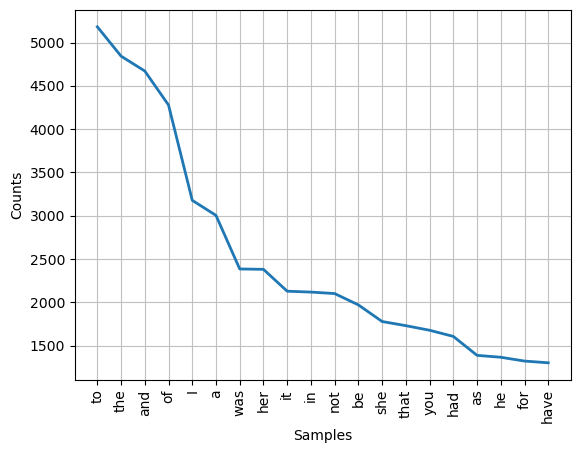

In [33]:
text.plot(20)  # 20개 단어의 빈도
plt.show()

- dispersion_plot() 메서드는 단어가 사용된 위치를 시각화한다. 소설 엠마의 각 등장인물에 대해 적용하면 다음과 같은 결과를 얻는다.

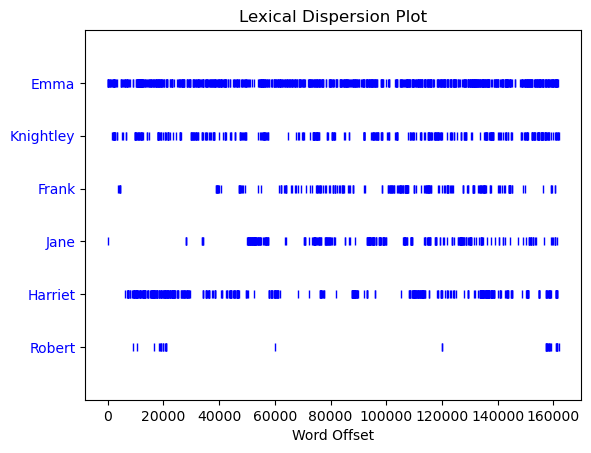

In [34]:
text.dispersion_plot(["Emma", "Knightley", "Frank", "Jane", "Harriet", "Robert"])

- concordance() 메서드로 단어가 사용된 위치를 직접 표시하면 문맥(context)이 어떤지 볼 수 있다. 여기에서 문맥은 해당 단어의 앞과 뒤에 사용된 단어를 뜻한다.

In [35]:
text.concordance('Emma')

Displaying 25 of 865 matches:
 Emma by Jane Austen 1816 VOLUME I CHAPTER
 Jane Austen 1816 VOLUME I CHAPTER I Emma Woodhouse handsome clever and rich w
f both daughters but particularly of Emma Between _them_ it was more the intim
nd friend very mutually attached and Emma doing just what she liked highly est
 by her own The real evils indeed of Emma s situation were the power of having
ding day of this beloved friend that Emma first sat in mournful thought of any
going only half a mile from them but Emma was aware that great must be the dif
a day It was a melancholy change and Emma could not but sigh over it and wish 
ll the rest of her life at Hartfield Emma smiled and chatted as cheerfully as 
l be able to tell her how we all are Emma spared no exertions to maintain this
or I have a great regard for you and Emma but when it comes to the question of
a fanciful troublesome creature said Emma playfully That is what you have in y
e few people who could see faults in Emma Woodhouse and th

similar() 메서드는 같은 문맥에서 주어진 단어 대신 사용된 횟수가 높은 단어들을 찾는다

In [36]:
text.similar("Emma")

she it he i harriet you her jane him that me and all they them herself
there but be isabella


- 두 단어의 공통 문맥을 보려면 `common_contexts` 메서드를 사용한다

In [37]:
text.common_contexts(["Emma","she"])

said_i and_could but_could said_as and_was that_could and_felt
which_could that_began than_had but_was that_should this_could
there_was said_in as_could think_was as_felt that_was which_had


## [ FreqDist ( Frequency Distributions ) ]
- `FreqDist` 클래스는 문서에 사용된 단어(토큰)의 사용빈도 정보를 담는 클래스이다.
- `Text` 클래스의 `vocab` 메서드로 추출할 수 있다.

In [39]:
from nltk import FreqDist

stopwords = ["Mr.", "Mrs.", "Miss", "Mr", "Mrs", "Dear"]  # 불용어
emma_tokens = pos_tag(retokenize.tokenize(emma_raw))

# 품사 태그에서 NNP(고유명사)이면서 필요없는 단어(stopwords)는 제거한다.
names_list = [t[0] for t in emma_tokens if t[1] == 'NNP' and t[0] not in stopwords]
print(names_list[:10])

['Jane', 'Austen', 'VOLUME', 'Emma', 'Woodhouse', 'Sixteen', 'Taylor', 'Woodhouse', 'Emma', 'Between']


- `FreqDist` 클래스는 단어를 키(key), 출현빈도를 값(value)으로 가지는 사전 자료형과 유사하다. 다음 코드는 전체 단어의 수, "Emma"라는 단어의 출현 횟수, 확률을 각각 계산한다.

In [40]:
fd_names = FreqDist(names_list)

In [41]:
fd_names.N(), fd_names['Emma'], fd_names.freq("Emma")

(7863, 830, 0.10555767518758744)

- `most_common` 메서드를 사용하면 가장 출현 횟수가 높은 단어를 찾는다.

In [42]:
fd_names.most_common(5)

[('Emma', 830),
 ('Harriet', 491),
 ('Weston', 439),
 ('Knightley', 389),
 ('Elton', 385)]

## [ 워드클라우드 ]

In [43]:
! pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/9d/06/059a7e33548acf6c7bd29f96b2e495571797b4397353bf79631559b97948/wordcloud-1.9.2-cp38-cp38-win_amd64.whl.metadata
   ---------------------------------------- 0.0/153.1 kB ? eta -:--:--
   ------------------------------------- -- 143.4/153.1 kB 2.8 MB/s eta 0:00:01
   ---------------------------------------- 153.1/153.1 kB 3.0 MB/s eta 0:00:00


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


- wordcloud 패키지를 사용하면 단어의 사용 빈도수에 따라 워드클라우드(Word Cloud) 시각화를 할 수 있다.

In [48]:
from wordcloud import WordCloud
wc = WordCloud(width=1000, height=600, background_color="white", random_state=0)
plt.imshow(wc.generate_from_frequencies(fd_names))
plt.axis('off')
plt.show()

In [51]:
# 수정된 코드
wc = WordCloud(width=1000, height=600, background_color="white", random_state=0)
# WordCloud 객체를 만들 때 폰트 지정을 추가합니다.
# 예시로, 'arial' 폰트를 사용합니다. 필요한 폰트가 시스템에 설치되어 있어야 합니다.
wc.generate_from_frequencies(fd_names)

plt.imshow(wc)
plt.axis('off')
plt.show()

AttributeError: 'TransposedFont' object has no attribute 'getbbox'

## 4. 불용어(stopword)
- 큰 의미가 없는 단어 토큰을 제거하는 작업이 필요 - 자주 등장하지만 분석을 하는 것에 있어서는 큰 도움이 되지 않는 단어
- NLTK에서는 100여개 이상의 영어 단어들을 불용어로 패키지 내에서 미리 정의

### 4.1 불용어 확인하기

In [46]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 

stop_words_list = stopwords.words('english')
print('불용어 개수 :', len(stop_words_list))
print('불용어 10개 출력 :',stop_words_list[:10])

불용어 개수 : 179
불용어 10개 출력 : ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


### 4.2 불용어 제거하기

In [47]:
example = "Family is not an important thing. It's everything."
stop_words = set(stopwords.words('english')) 

word_tokens = word_tokenize(example)

result = []
for word in word_tokens: 
    if word not in stop_words: 
        result.append(word) 

print('불용어 제거 전 :',word_tokens) 
print('불용어 제거 후 :',result)

불용어 제거 전 : ['Family', 'is', 'not', 'an', 'important', 'thing', '.', 'It', "'s", 'everything', '.']
불용어 제거 후 : ['Family', 'important', 'thing', '.', 'It', "'s", 'everything', '.']
